# Car Price Dataset

## We will follow thes steps : 

### 1. Load & Explore the Data
- Load the dataset in Pandas
- Check missing values, data types, and basic statistics

### 2. Data Cleaning & Preprocessing
- Handle missing values
- Convert categorical data into numerical format (One-Hot Encoding)
- Normalize numerical features (Mileage, Engine Size, etc.)

### 3. Exploratory Data Analysis (EDA)
- Visualize distributions (Price, Year, Mileage)
- Boxplots for categorical features (Brand, Fuel Type)

### 4. Feature Engineering & Selection
- Extract important features (e.g., Car Age = 2025 - Year)
- Remove unnecessary columns

### 5. Train Machine Learning Models
- Linear Regression (Baseline Model)

### 6. Model Evaluation & Prediction
- Compare models using MSE, R² score

### Import python libraries

In [3]:
import pandas as pd

### 1. Load and explore data

In [4]:
df = pd.read_csv("car_price_dataset.csv")

In [5]:
# Display first few rows
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [8]:
# Show dataset Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [9]:
# Check for missing values
print(df.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


#### There are no missing values

### 2. Data cleaning & preprocessing

#### 2.1 Missing values

Since there are no missing values, we will Convert Categorical Data into Numeric Format.

Many columns (Brand, Fuel_Type, Transmission) are categorical. Machine learning models work with numbers, so we must convert them using **One-Hot Encoding**.

For example, you have a column for car Brand, with categories like "Toyota", "BMW", "Ford". The algorithm can't directly process "Toyota" as it needs a numeric representation.

**What is One-Hot Encoding ?**

One of the most common techniques to convert categorical data into numeric format is One-Hot Encoding.
One-Hot Encoding creates a new binary column (0 or 1) for each category in the feature.
- If a car is a "Toyota", the "Toyota" column will have a 1, and the rest will have a 0.
- If a car is a "BMW", the "BMW" column will have a 1, and the rest will have a 0.



In [11]:
# Convert Categorical Columns
# pd.get_dummies is a pandas function that converts categorical variables into a form that can be provided to machine learning algorithms (by converting them into one-hot encoded columns).
df = pd.get_dummies(df, columns = ["Brand", "Fuel_Type", "Transmission"], drop_first=True)

In [17]:
df.head()

,Model,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic,Car_Age
0,Rio,4.2,289944,3,5,8501,False,False,False,False,...,True,False,False,False,False,False,False,True,False,5
1,Malibu,2.0,5356,2,3,12092,False,True,False,False,...,False,False,False,False,False,True,False,False,False,13
2,GLA,4.2,231440,4,2,11171,False,False,False,False,...,False,True,False,False,False,False,False,False,False,5
3,Q5,2.0,160971,2,1,11780,False,False,False,False,...,False,False,False,False,True,False,False,True,False,2
4,Golf,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,True,False,True,False,False,True,22


#### 2.2 Feature Engineering

We create a new column Car_Age by calculating the difference between the current year (2025) and the car's production Year. 

The original Year column was then dropped since we don't need it

In [13]:
df["Car_Age"] = 2025 - df["Year"]
df.drop(columns=["Year"], inplace=True)

In [16]:
df.head()

,Model,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic,Car_Age
0,Rio,4.2,289944,3,5,8501,False,False,False,False,...,True,False,False,False,False,False,False,True,False,5
1,Malibu,2.0,5356,2,3,12092,False,True,False,False,...,False,False,False,False,False,True,False,False,False,13
2,GLA,4.2,231440,4,2,11171,False,False,False,False,...,False,True,False,False,False,False,False,False,False,5
3,Q5,2.0,160971,2,1,11780,False,False,False,False,...,False,False,False,False,True,False,False,True,False,2
4,Golf,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,True,False,True,False,False,True,22


#### 2.3 Data Normalization

Data normalization is the process of adjusting the scale of numerical features so that they are on a similar scale. This step is crucial for many machine learning models because it ensures that features with large ranges (e.g., price, mileage) don’t disproportionately influence the model compared to features with smaller ranges (e.g., car age)

Since Features like Mileage, Engine_Size, Price have different scales.
We use Min-Max Scaling or Standardization to normalize them.

There are different methods of normalization, but two of the most commonly used are **Min-Max** Scaling and **Standardization**

In [18]:
#  Normalize Numerical Features with Min-Max scalling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Choose the columns to normalize (e.g., 'Mileage', 'Engine_Size', 'Price')
columns_to_normalize = ['Mileage', 'Engine_Size', 'Price']

# Fit and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [19]:
# View Normalized Data
df.head()

,Model,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic,Car_Age
0,Rio,0.80,0.966648,3,5,0.398810,False,False,False,False,...,True,False,False,False,False,False,False,True,False,5
1,Malibu,0.25,0.017775,2,3,0.619103,False,True,False,False,...,False,False,False,False,False,True,False,False,False,13
2,GLA,0.80,0.771584,4,2,0.562604,False,False,False,False,...,False,True,False,False,False,False,False,False,False,5
3,Q5,0.25,0.536626,2,1,0.599963,False,False,False,False,...,False,False,False,False,True,False,False,True,False,2
4,Golf,0.40,0.955558,3,3,0.053187,False,False,False,False,...,False,False,False,True,False,True,False,False,True,22


In [19]:
# View Normalized Data
df.head()

,Model,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic,Car_Age
0,Rio,0.80,0.966648,3,5,0.398810,False,False,False,False,...,True,False,False,False,False,False,False,True,False,5
1,Malibu,0.25,0.017775,2,3,0.619103,False,True,False,False,...,False,False,False,False,False,True,False,False,False,13
2,GLA,0.80,0.771584,4,2,0.562604,False,False,False,False,...,False,True,False,False,False,False,False,False,False,5
3,Q5,0.25,0.536626,2,1,0.599963,False,False,False,False,...,False,False,False,False,True,False,False,True,False,2
4,Golf,0.40,0.955558,3,3,0.053187,False,False,False,False,...,False,False,False,True,False,True,False,False,True,22


In [21]:
# Save the cleanes dataset
df.to_csv("cleaned_car_price_dataset.csv", index=False)
print("✅ Data cleaning & preprocessing completed! Ready for analysis.")

✅ Data cleaning & preprocessing completed! Ready for analysis.


### 3. Exploratory Data Analysis (EDA)

##### This step helps us understand the dataset by visualizing relationships between features and price.

#### 3.1  Summary Statistics
Check mean, median, min, max, and standard deviation of numerical columns

In [22]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_car_price_dataset.csv")

In [23]:
# Show statistics of numerical features
print(df.describe())

        Engine_Size       Mileage         Doors   Owner_Count         Price  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.500140      0.497510      3.497100      2.991100      0.420401   
std        0.287331      0.287816      1.110097      1.422682      0.190945   
min        0.000000      0.000000      2.000000      1.000000      0.000000   
25%        0.250000      0.248812      3.000000      2.000000      0.285013   
50%        0.500000      0.498670      3.000000      3.000000      0.420741   
75%        0.750000      0.745369      4.000000      4.000000      0.557420   
max        1.000000      1.000000      5.000000      5.000000      1.000000   

            Car_Age  
count  10000.000000  
mean      13.456300  
std        6.897699  
min        2.000000  
25%        8.000000  
50%       13.000000  
75%       19.000000  
max       25.000000  


#### 3.2  Visualize Data Distributions
Histograms to see the distribution of Price, Mileage, Engine_Size, Car_Age.
Boxplots to detect outliers.

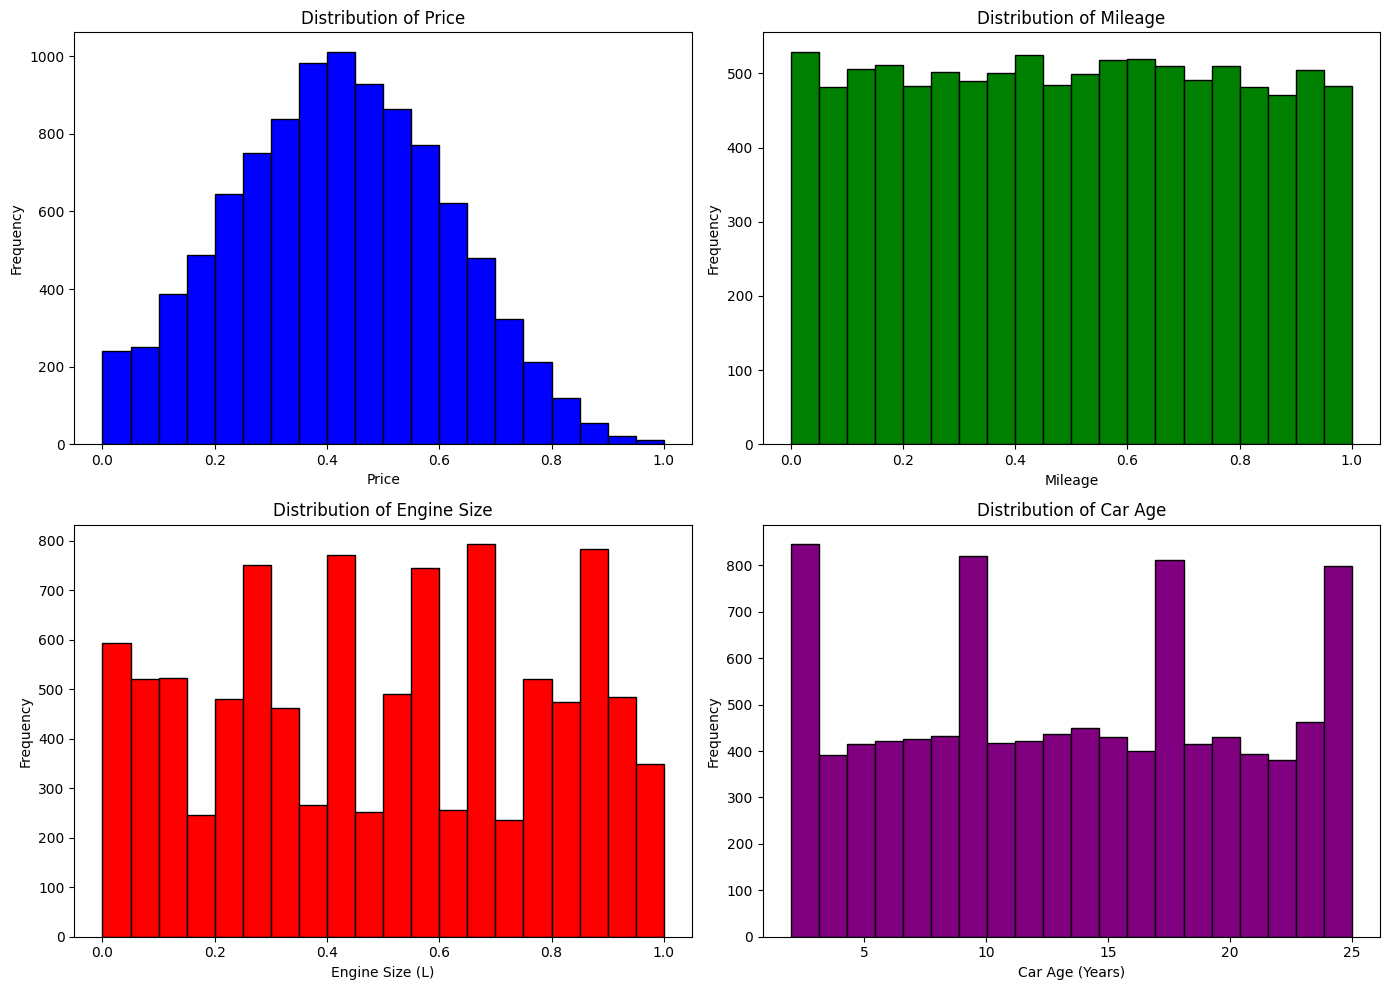

In [28]:
# Set up the figure for histograms
plt.figure(figsize=(14, 10))

# Plot histogram for 'Price'
plt.subplot(2, 2, 1)
plt.hist(df['Price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot histogram for 'Mileage'
plt.subplot(2, 2, 2)
plt.hist(df['Mileage'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

# Plot histogram for 'Engine_Size'
plt.subplot(2, 2, 3)
plt.hist(df['Engine_Size'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')

# Plot histogram for 'Car_Age'
plt.subplot(2, 2, 4)
plt.hist(df['Car_Age'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 3.3 Visualizing Outliers with Boxplots
Boxplots can be used to detect potential outliers by showing the interquartile range (IQR) and the median. 

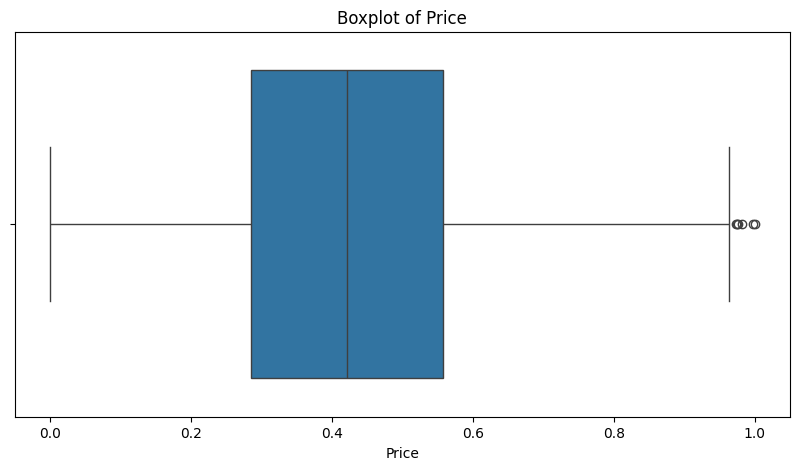

In [29]:
# Boxplots for detecting outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

### 4. Feature Engineering & Selection¶

In [32]:
# Drop unnecessary columns
df.drop(columns=["Model", "Owner_Count"], inplace=True)  # 'Owner_Count' may not be relevant to the price prediction task


### 5. Train Machine Learning Models¶

We will use Linear Regression here

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate R² Score
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr}")
print(f"Linear Regression - R² Score: {r2_lr}")

Linear Regression - Mean Squared Error (MSE): 1.578860905011501e-05
Linear Regression - R² Score: 0.9995433743820566


### Mean Squared Error (MSE): 
1.578860905011501e-05 is extremely low, indicating that your model's predictions are very close to the actual values. This suggests your model is performing well, with very little error.

### R² Score: 
0.9995 is excellent, as it means your model is explaining 99.95% of the variance in the target variable (Price). This is a very high score, and it typically suggests that your model is well-suited to the data.